Disclaimer :  This is purely an assigned research thus use this with a word of caution from my side

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import polyphase
import numpy as np
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

In [54]:
# Figuring out upper hull using the normals
from scipy.spatial import ConvexHull

def get_lower_convexhull(points):
    inf_ind = np.shape(points)[0]
    base_points = points[:,:-1].mean(axis=0)
    inf_height = 1e10*max(points[:,-1])
    p_inf = np.hstack((base_points,inf_height))
    points_inf = np.vstack((points,p_inf))
    hull = ConvexHull(points_inf)
    lower = ~(hull.simplices==inf_ind).any(axis=1)
    lower_hull = hull.simplices[lower]
    
    return lower_hull


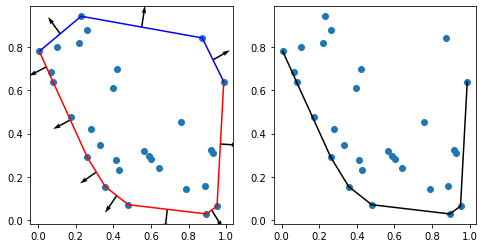

In [55]:
# 2D example of Upper Hull and Lower Hull
points = np.random.rand(30,2)

hull = ConvexHull(points)
fig, axs = plt.subplots(1,2,figsize=(2*4,4))
axs[0].plot(points[:,0], points[:,1], 'o')
for equation,simplex in zip(hull.equations,hull.simplices):
    X,Y = points[simplex].mean(axis=0)
    U,V,_ = equation
    if V>0:
        color = 'b-'
    else:
        color = 'r-'
    axs[0].plot(points[simplex, 0], points[simplex, 1], color)    
    axs[0].quiver(X,Y,U,V,scale=10,scale_units='xy')

lower_hull = get_lower_convexhull(points)
axs[1].plot(points[:,0], points[:,1], 'o')
for simplex in lower_hull:
    axs[1].plot(points[simplex, 0], points[simplex, 1], 'k-')
    
plt.show()

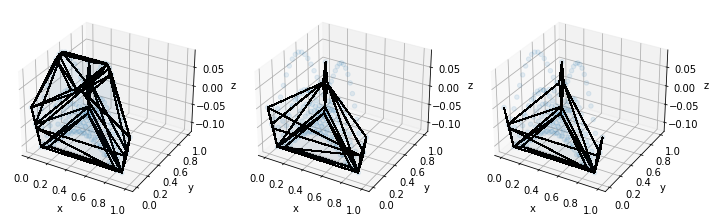

In [56]:
grid = polyphase.makegridnd(20,3)
M = [1,1,1]
chi = [3.1,3.1,3.1]
f = lambda x: polyphase.flory_huggins(x,M,chi)
energy = np.asarray([f(x) for x in grid.T])
points = np.concatenate((grid[:-1,:].T,energy.reshape(-1,1)),axis=1)

hull = ConvexHull(points)
lower_hull = get_lower_convexhull(points)
zlower = hull.equations[:,-2]<0

fig, axs = plt.subplots(1,3,figsize=(3*4,4),subplot_kw={'projection':'3d'})
triangles = [hull.simplices, lower_hull,hull.simplices[zlower]]
for i in range(3):
    axs[i].scatter(points[:,0], points[:,1],points[:,2],alpha=0.1)
    axs[i].plot_trisurf(points[:,0],points[:,1],points[:,2],triangles=triangles[i],
                    linewidth=1.0,edgecolor='k', antialiased=False,facecolor='grey',alpha=0.05)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_zlabel('z')
    
plt.show()

Computation took 41.36s


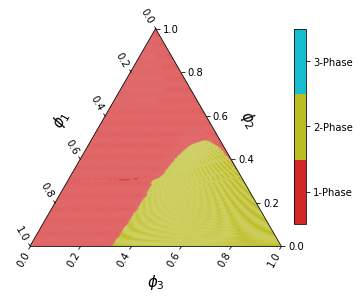

In [57]:
M, chi = polyphase.get_sample_data(1)
f = lambda x : polyphase.flory_huggins(x, M, chi)
engine = polyphase.PHASE(f,200,len(M))
engine.compute(correction=3,refine_simplices=False,thresh_scale=10)
engine.plot()

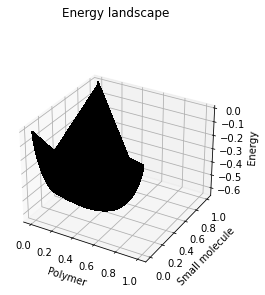

In [58]:
polyphase.plot_energy_landscape(engine.as_dict(),mode='convex_hull')
plt.show()

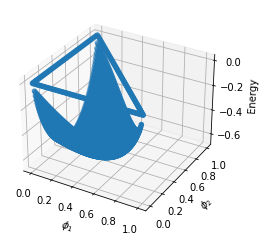

In [19]:
fig,ax = plt.subplots(subplot_kw = {'projection':'3d'})
ax.scatter(engine.grid[0,:],engine.grid[1,:],engine.energy)
ax.set_xlabel(r'$\phi_1$')
ax.set_ylabel(r'$\phi_2$')
ax.set_zlabel('Energy')
plt.show()

Computation took 28.26s


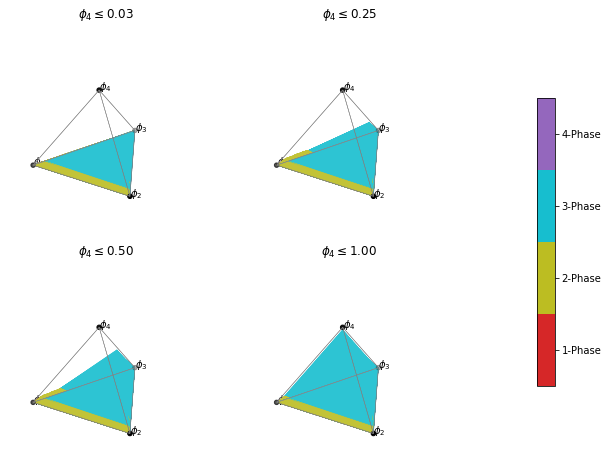

Computation took 29.44s


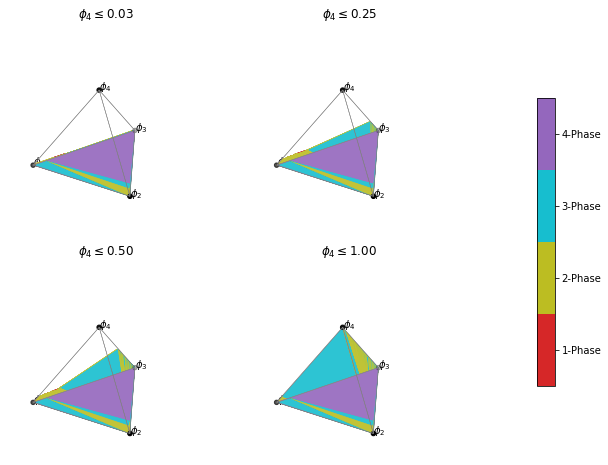

Computation took 29.75s


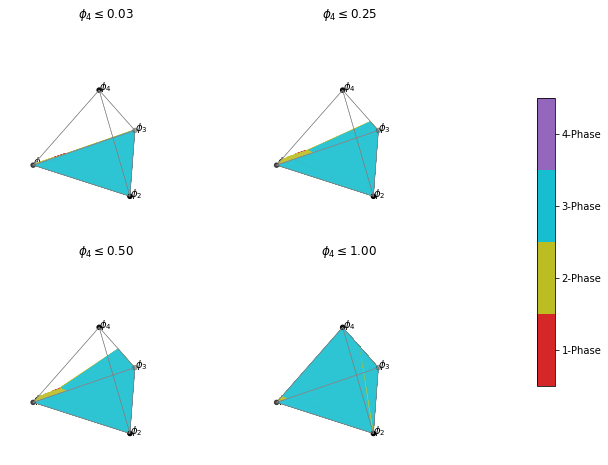

In [25]:
M = [1120.63, 14.40, 2.41, 1.0]
chi = [0.379,0.436,1.896, 0.583,2.393,1.320]

f = lambda x : polyphase.flory_huggins(x, M, chi)
engine = polyphase.PHASE(f,100,len(M))
for i in [1,2,3]:
    engine.compute(correction=i,refine_simplices=False)
    engine.plot()